In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 100

In [2]:
# read the dataset

df = pd.read_csv('autos.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [3]:
df.shape

(313687, 27)

In [4]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

### Vehicle distribution based on year of registration

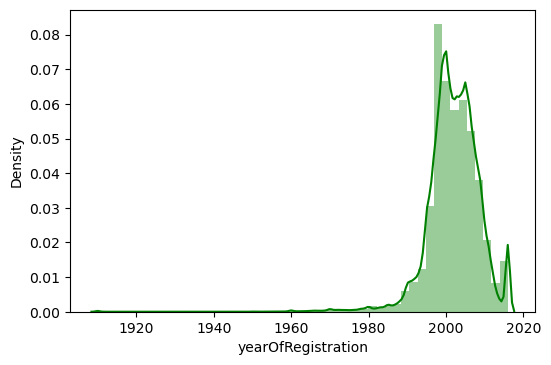

In [32]:
sns.distplot(df['yearOfRegistration'], color = 'green')
plt.show()

### Price range variation by vehicle type

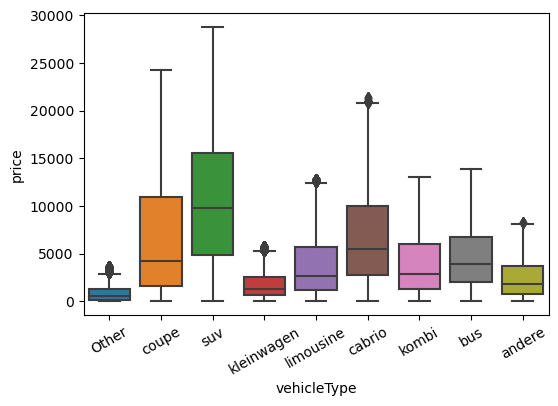

In [31]:
sns.boxplot(x=df['vehicleType'], y=df['price'])
plt.xticks(rotation=30)
plt.show()

### Total count of vehicles for sale by vehicle type

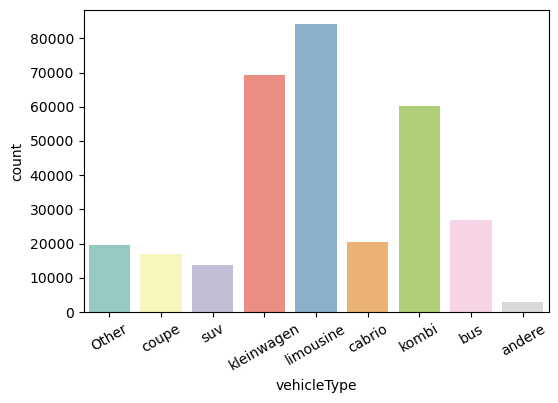

In [30]:
forSale = df[df['offerType'] == 'Offer']
sns.countplot(x = forSale['vehicleType'], palette="Set3")
plt.xticks(rotation=30)
plt.show()

### Number of vehicles belonging to each brand

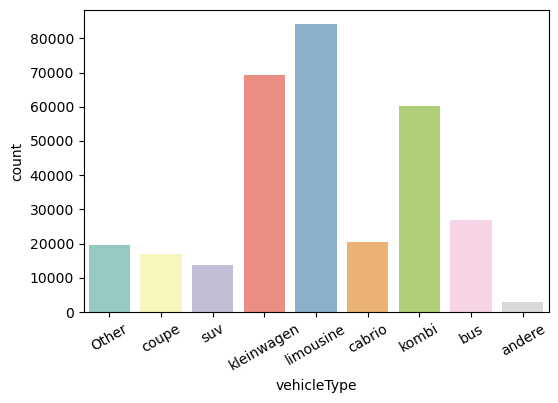

In [29]:
sns.countplot(x='vehicleType', data=df, palette="Set3")
plt.xticks(rotation=30)
plt.show()

### Vehicle price based on vehicle type as well as gearbox type

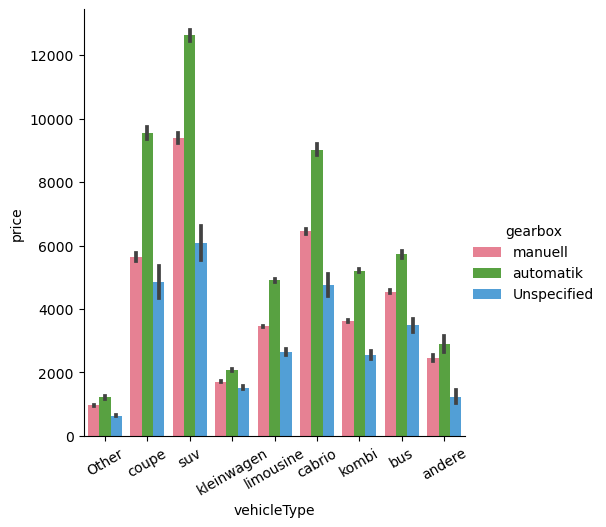

In [28]:
sns.catplot(data=df, kind='bar', x='vehicleType', y='price', hue='gearbox', palette="husl")
plt.xticks(rotation=30)
plt.show()

### Vehicle price by fuel type and gearbox type

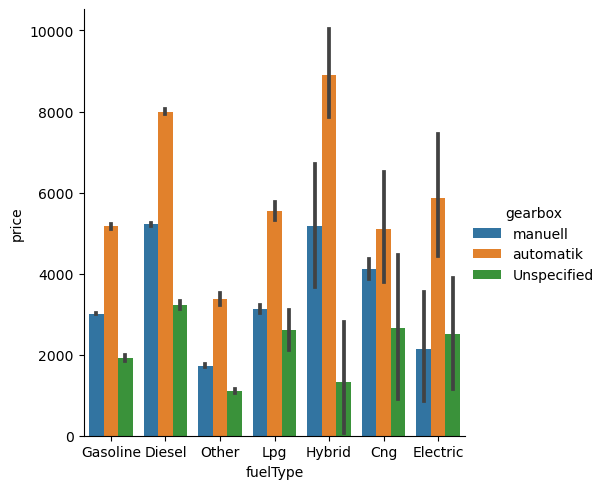

In [37]:
sns.catplot(data=df, kind='bar', x='fuelType', y='price', hue='gearbox')
plt.show()

### Power of a vehicle by vehicle type and gearbox type

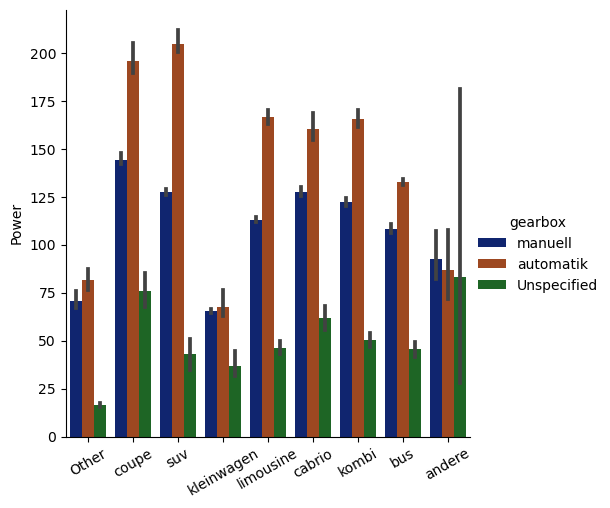

In [43]:
figPower = sns.catplot(data=df, kind='bar', x='vehicleType', y='powerPS', hue='gearbox', palette='dark')
figPower.set_axis_labels("", "Power")
plt.xticks(rotation=30)
plt.show()

### Average price per brand and per vehicle

In [51]:
avgBrand = df.groupby('brand')['price'].mean()
print('The average price per brand is:\n\n')
print(avgBrand)

The average price per brand is:


brand
alfa_romeo         3242.648623
audi               5344.676648
bmw                5475.757677
chevrolet          5512.385298
chrysler           3317.075429
citroen            3074.707633
dacia              5602.260759
daewoo             1011.812865
daihatsu           1653.563307
fiat               2220.893938
ford               2758.299674
honda              3346.090190
hyundai            4883.190536
jaguar             5706.465011
jeep               8841.573633
kia                5034.790219
lada               3015.393519
lancia             2186.089655
land_rover        10488.214286
mazda              3495.382150
mercedes_benz      5377.710930
mini               8452.533111
mitsubishi         2769.714235
nissan             3671.209627
opel               2393.484983
peugeot            2928.353710
porsche           12683.848629
renault            2066.985720
rover              1333.613537
saab               3575.846154
seat               3009.359372

In [50]:
avgType = df.groupby('vehicleType')['price'].mean()
print('The average price per vehicle is:\n\n')
print(avgType)

The average price per vehicle is:


vehicleType
Other           861.466447
andere         2400.906465
bus            4677.360601
cabrio         6934.699382
coupe          6741.053960
kleinwagen     1730.123085
kombi          3961.032129
limousine      3745.179122
suv           10772.809349
Name: price, dtype: float64


In [56]:
dfNew = pd.DataFrame(df.groupby(['brand','vehicleType'])['price'].mean())
dfNew.head(20)

price
brand      vehicleType              
alfa_romeo Other          669.805556
           andere         962.500000
           cabrio        7035.727778
           coupe         5265.458874
           kleinwagen    1867.865248
           kombi         3312.968680
           limousine     2600.240964
           suv              0.000000
audi       Other         1012.599251
           andere        2685.311828
           bus           3485.000000
           cabrio        9655.285628
           coupe        11242.325869
           kleinwagen    2582.206074
           kombi         5442.982216
           limousine     3829.821096
           suv          18644.243902
bmw        Other          896.748086
           andere        1720.388393
           bus           4064.000000